In [7]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
MODELS_INFO = {
    'gpt2-large': 'recurring__gsm8k__gpt2-large__output.json',
    'gemma-2b': 'recurring__gsm8k__gemma-2b__output.json',
    'gemma-7b':  None,#'recurring__gsm8k__gemma-7b__output.json',
}

MAJORITY_THRESHOLDS = np.arange(0.125, 1.1, 0.125)

RECURRING_TIMESTEPS = 5

In [3]:
def terminated_at_timestep(instance, timestep, majority_threshold=0.5):
    answer_distributions = instance['answer_distribution']
    if len(answer_distributions) < timestep:
        return True
    
    return answer_distributions[timestep-1][0][1] >= majority_threshold

def get_percentage_of_terminations(model_name, timestep, majority_threshold=0.5):
    if MODELS_INFO[model_name] is None:
        return 0
    
    file = os.path.join('../../results/', MODELS_INFO[model_name])
    outputs = json.load(open(file))
    
    return sum([1 for instance in outputs if terminated_at_timestep(instance, timestep, majority_threshold)]) / len(outputs)

In [4]:
plot_df = pd.DataFrame(columns=['model', 'time_step', 'majority_threshold', 'percentage_of_majority_terminations'])

for model_name in MODELS_INFO:
    for time_step in range(1, RECURRING_TIMESTEPS + 1):
        for majority_threshold in MAJORITY_THRESHOLDS:
            print(f'Processing {model_name} at time step {time_step} with majority threshold {majority_threshold}')
            percentage_of_terminations = get_percentage_of_terminations(model_name, time_step, majority_threshold)
            plot_df = pd.concat([plot_df, pd.DataFrame([{
                'model': model_name,
                'time_step': time_step,
                'majority_threshold': majority_threshold,
                'percentage_of_majority_terminations': percentage_of_terminations
            }])], ignore_index=True)

Processing gpt2-large at time step 1 with majority threshold 0


/tmp/ipykernel_145088/1532201319.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame([{


Processing gpt2-large at time step 1 with majority threshold 0.6
Processing gpt2-large at time step 1 with majority threshold 0.7
Processing gpt2-large at time step 1 with majority threshold 0.8
Processing gpt2-large at time step 2 with majority threshold 0
Processing gpt2-large at time step 2 with majority threshold 0.6
Processing gpt2-large at time step 2 with majority threshold 0.7
Processing gpt2-large at time step 2 with majority threshold 0.8
Processing gpt2-large at time step 3 with majority threshold 0
Processing gpt2-large at time step 3 with majority threshold 0.6
Processing gpt2-large at time step 3 with majority threshold 0.7
Processing gpt2-large at time step 3 with majority threshold 0.8
Processing gpt2-large at time step 4 with majority threshold 0
Processing gpt2-large at time step 4 with majority threshold 0.6
Processing gpt2-large at time step 4 with majority threshold 0.7
Processing gpt2-large at time step 4 with majority threshold 0.8
Processing gpt2-large at time s

In [5]:
plot_df.head(20)

,model,time_step,majority_threshold,percentage_of_majority_terminations
0,gpt2-large,1,0,1.000000
1,gpt2-large,1,0.6,0.153776
2,gpt2-large,1,0.7,0.078480
3,gpt2-large,1,0.8,0.036169
4,gpt2-large,2,0,1.000000
5,gpt2-large,2,0.6,0.369313
6,gpt2-large,2,0.7,0.199500
7,gpt2-large,2,0.8,0.085987
8,gpt2-large,3,0,1.000000
9,gpt2-large,3,0.6,0.220200


[]

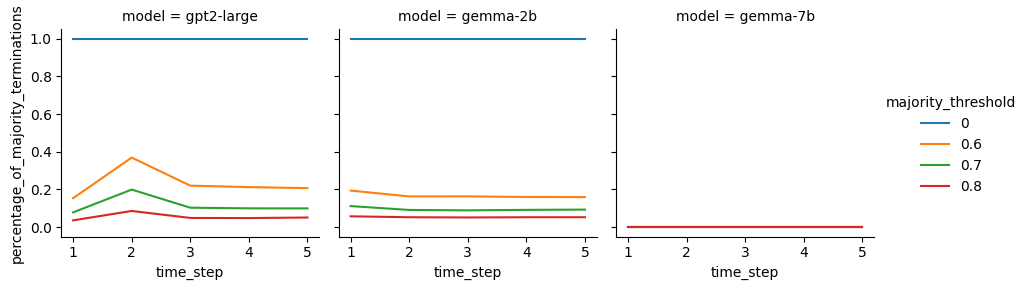

In [6]:
g = sns.FacetGrid(plot_df, col="model", hue="majority_threshold")
g.map(sns.lineplot,'time_step','percentage_of_majority_terminations')
g.add_legend()
plt.plot()